In [30]:
import numpy as np
import umap
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
near_traces = np.load("./near_traces_64.npy")
far_traces =  np.load("./far_traces_64.npy")
print(near_traces.shape, far_traces.shape)
#real_traces = real_traces.reshape(-1, 64)
well_i, well_x = 38, 138
well_variance_near = np.mean(np.std(near_traces[well_i-2:well_i+1, well_x-2:well_x+1], 2))
well_variance_far = np.mean(np.std(far_traces[well_i-2:well_i+1, well_x-2:well_x+1], 2))
near_traces /= well_variance_near
far_traces /= well_variance_far
print(near_traces.min(), near_traces.max())
print(far_traces.min(), far_traces.max())
near_traces_emb = near_traces.reshape(-1, 64)
far_traces_emb = far_traces.reshape(-1, 64)

(101, 251, 64) (101, 251, 64)
-5.895588494848423 6.0386670251870616
-7.854934933402996 6.753585219701001


In [32]:
embedding_near = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation', verbose=True).fit_transform(near_traces_emb)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='correlation',
   metric_kwds=None, min_dist=0.3, n_components=2, n_epochs=None,
   n_neighbors=5, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


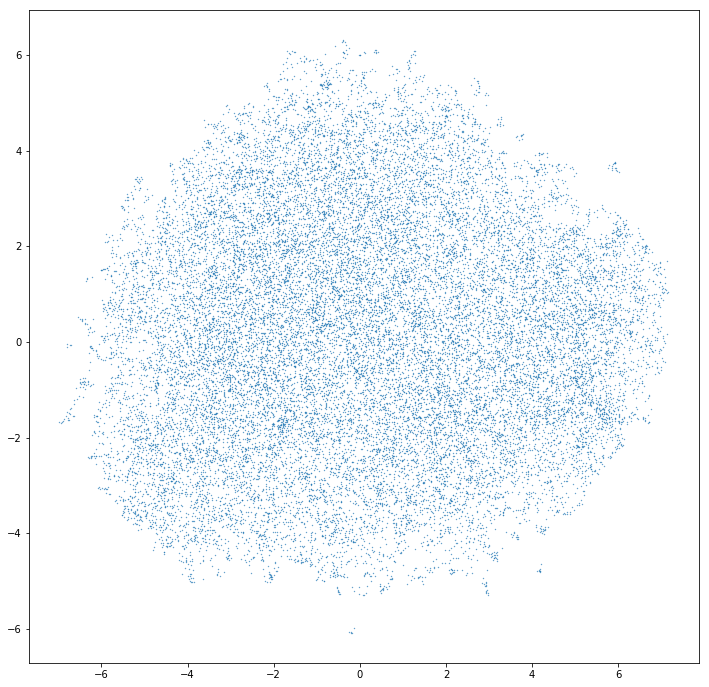

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(embedding_near[:, 0], embedding_near[:, 1], s=0.1)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='correlation',
   metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=None,
   n_neighbors=20, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	 6  /  15
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


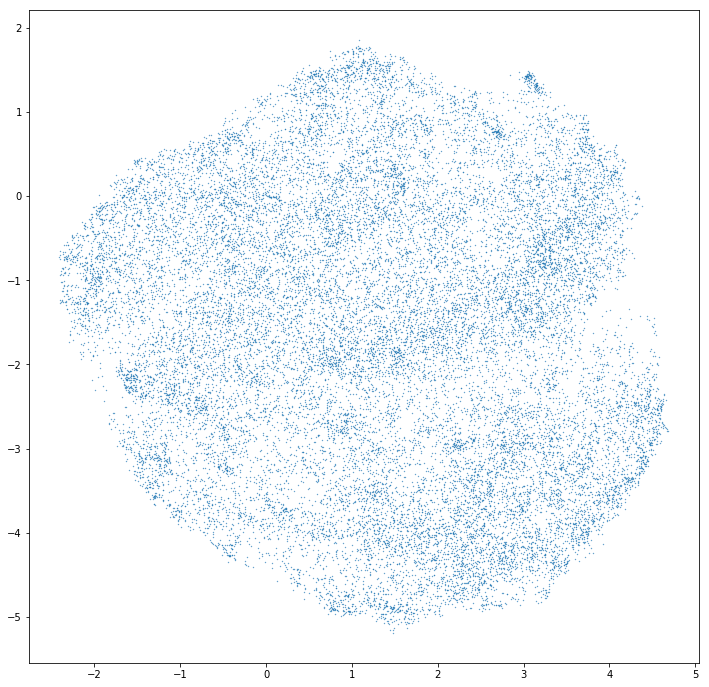

In [38]:
embedding_far = umap.UMAP(n_neighbors=20,
                      min_dist=0.001,
                      metric='correlation', verbose=True).fit_transform(far_traces_emb)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(embedding_far[:, 0], embedding_far[:, 1], s=0.1)

In [36]:
stacked = np.concatenate([far_traces_emb, near_traces_emb], 1)
print(stacked.shape)

(25351, 128)


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='correlation',
   metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=None,
   n_neighbors=20, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	 6  /  15
	 7  /  15
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


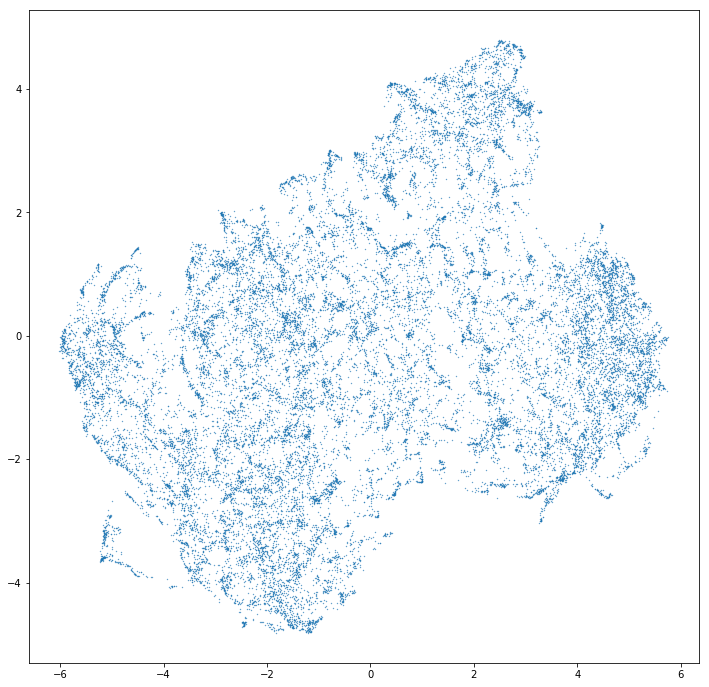

In [39]:
embedding_stack = umap.UMAP(n_neighbors=50,
                      min_dist=0.001,
                      metric='correlation', verbose=True).fit_transform(stacked)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(embedding_stack[:, 0], embedding_stack[:, 1], s=0.1)

In [40]:
x_avo = near_traces_emb
y_avo = far_traces_emb-near_traces_emb

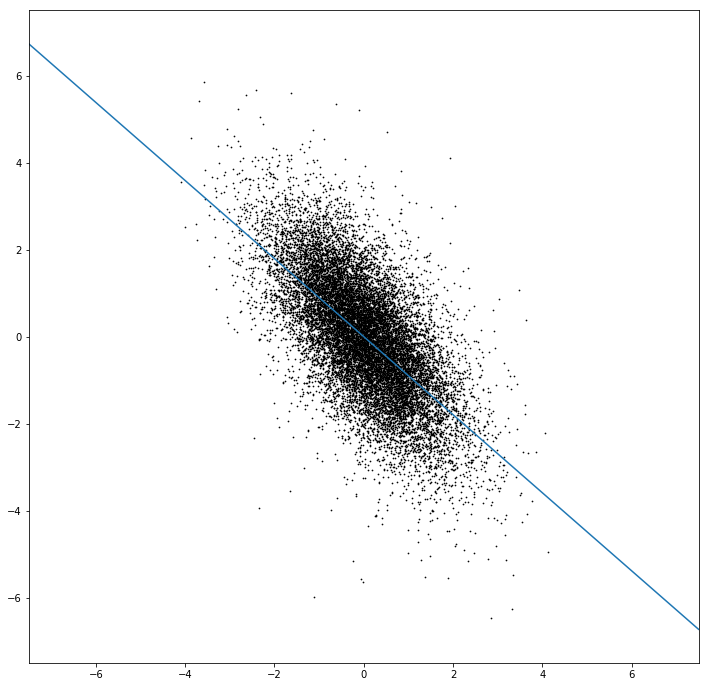

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(x_avo[::100], y_avo[::100], s=0.5, color="black")
ax.set_xlim(-7.5, 7.5)
ax.set_ylim(-7.5, 7.5)
x = np.linspace(-7.5, 7.5, 100)
ax.plot(x, lin_reg.coef_[0, 0]*x)

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=False, normalize=False, copy_X=True, n_jobs=1)
lin_reg.fit(x_avo.reshape(-1, 1), y_avo.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [58]:
print(lin_reg.coef_, lin_reg.intercept_)

[[-0.89724179]] 0.0


In [60]:
FF = y_avo-lin_reg.coef_*x_avo
print(FF.shape)

(25351, 64)


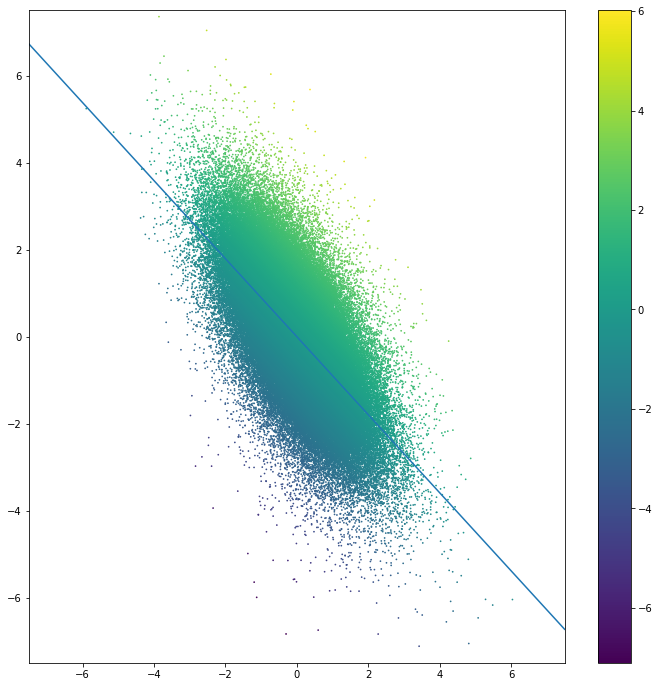

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sc = ax.scatter(x_avo[::10], y_avo[::10], s=0.5, c=FF[::10])
ax.set_xlim(-7.5, 7.5)
ax.set_ylim(-7.5, 7.5)
x = np.linspace(-7.5, 7.5, 100)
ax.plot(x, lin_reg.coef_[0, 0]*x)
fig.colorbar(sc)

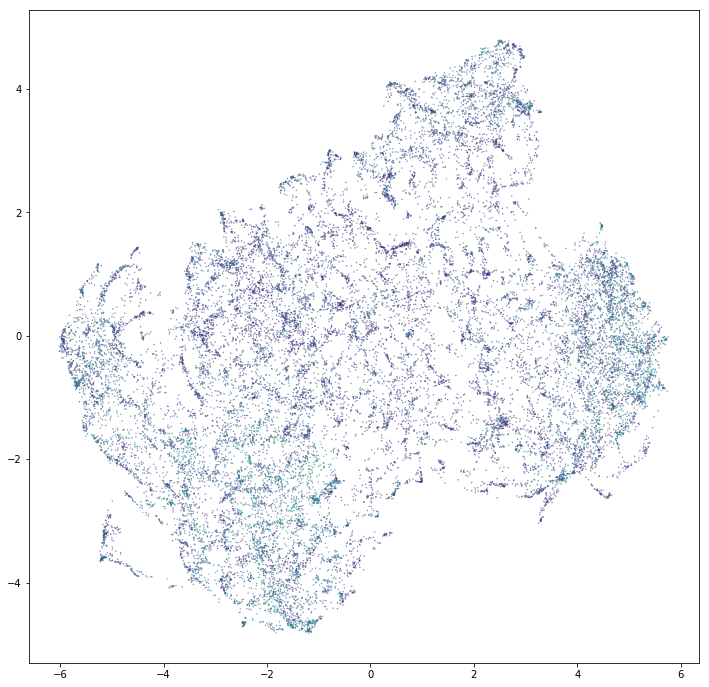

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(embedding_stack[:, 0], embedding_stack[:, 1], s=0.1, c=np.max(FF, 1))

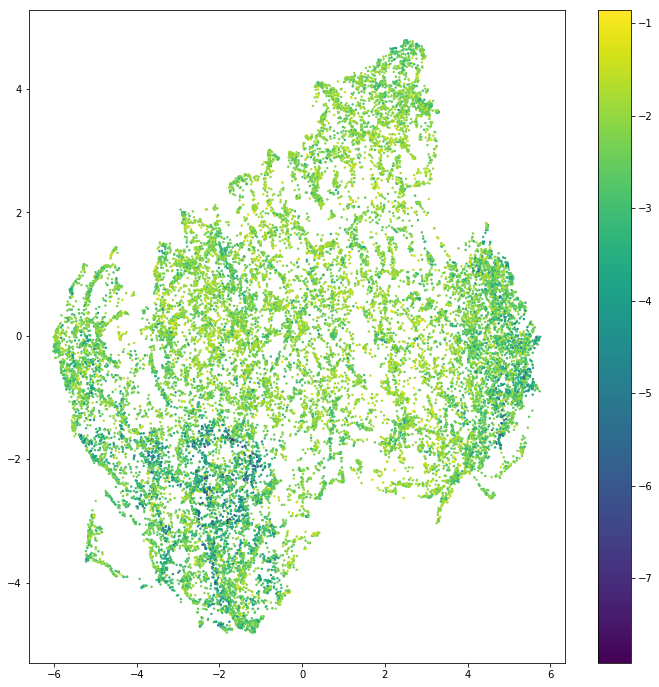

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sc = ax.scatter(embedding_stack[::, 0], embedding_stack[::, 1], s=2.0, c=np.min(FF, 1)[::])
fig.colorbar(sc)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='correlation',
   metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=None,
   n_neighbors=50, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


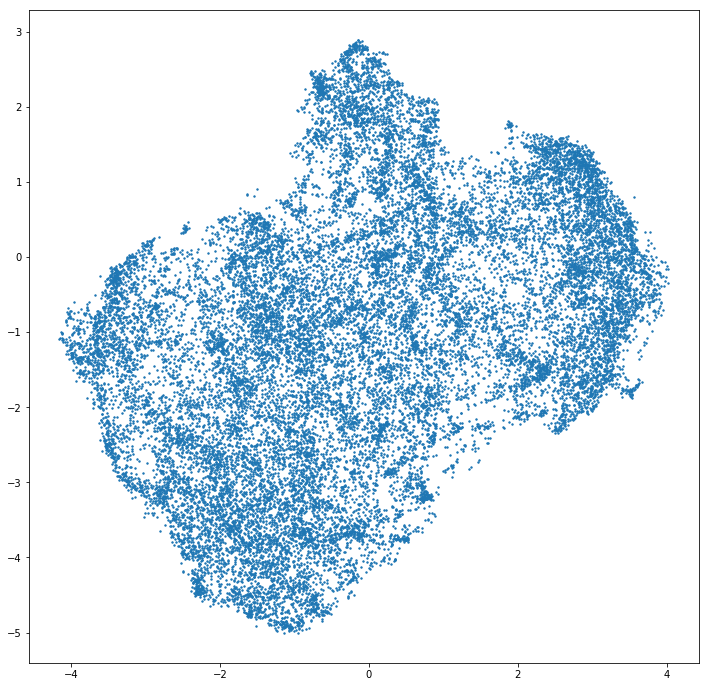

In [78]:
embedding_stack_ff = umap.UMAP(n_neighbors=50,
                      min_dist=0.001,
                      metric='correlation', verbose=True).fit_transform(np.concatenate([stacked, FF.reshape(-1, 64)], 1))
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(embedding_stack_ff[:, 0], embedding_stack_ff[:, 1], s=2.0)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='correlation',
   metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=None,
   n_neighbors=100, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	 6  /  15
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


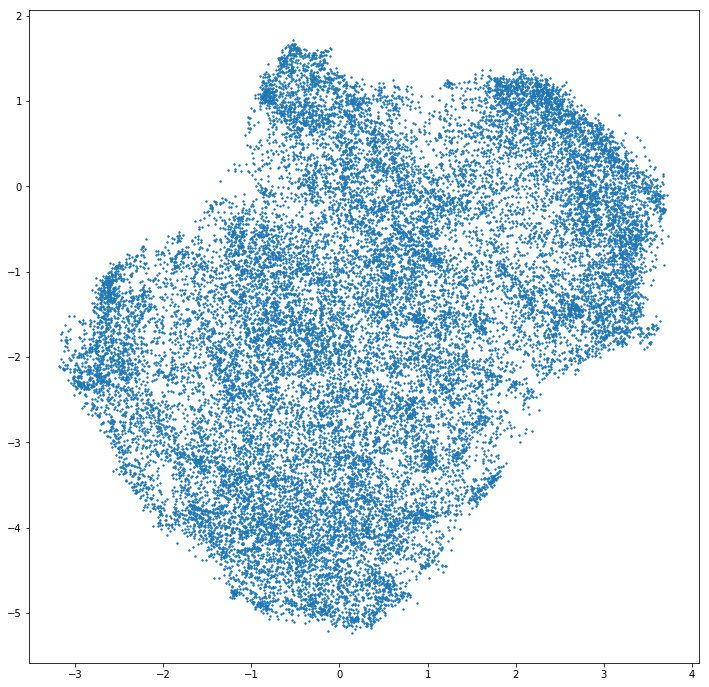

In [168]:
embedding_stack_ff2 = umap.UMAP(n_neighbors=100,
                      min_dist=0.001,
                      metric='correlation', verbose=True).fit_transform(np.concatenate([stacked, FF.reshape(-1, 64)], 1))
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(embedding_stack_ff2[:, 0], embedding_stack_ff2[:, 1], s=2.0)

In [170]:
from fastTSNE import TSNE
tsne = TSNE(verbose=True)

KeyboardInterrupt: 

In [ ]:
embedding_tsne = tsne.prepare_initial(np.concatenate([stacked, FF.reshape(-1, 64)], 1))
embedding_tsne = embedding_tsne.optimize(n_iter=250, exaggeration=12, momentum=0.5)
embedding_tsne = embedding_tsne.optimize(n_iter=750, momentum=0.8)
ax.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=2.0)

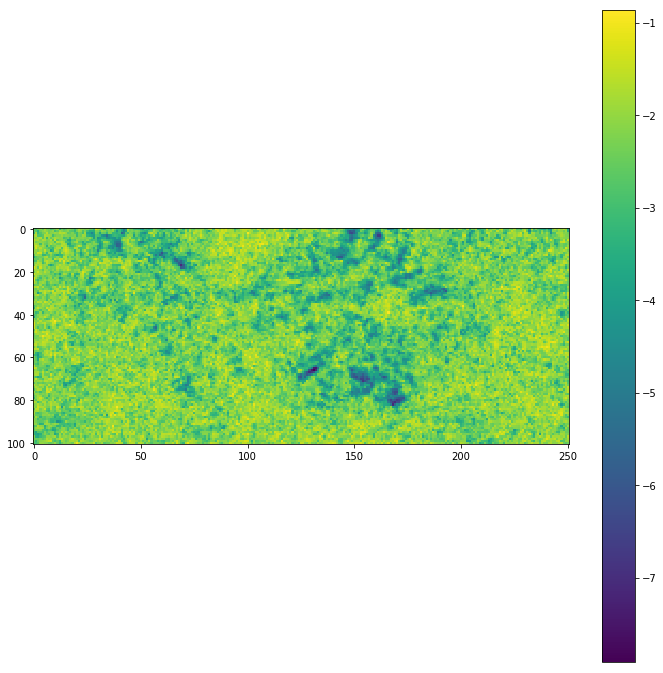

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sc = ax.imshow(np.min(FF.reshape(near_traces.shape[0], near_traces.shape[1], 64)[:, :, :], 2))
fig.colorbar(sc)

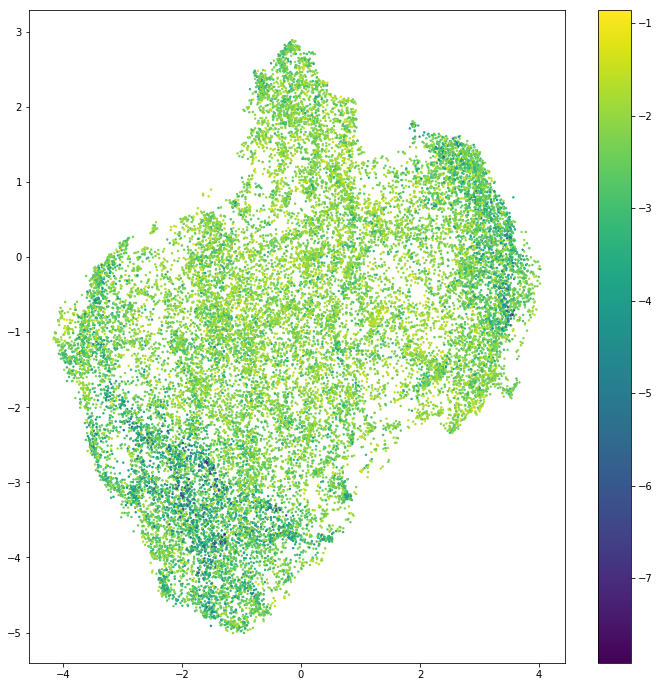

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sc = ax.scatter(embedding_stack_ff[::, 0], embedding_stack_ff[::, 1], s=2.0, c=np.min(FF, 1)[::])
fig.colorbar(sc)
fig.savefig("embedding_near_and_far_and_ff.png", dpi=300, bbox_inches="tight")

(25351, 2)


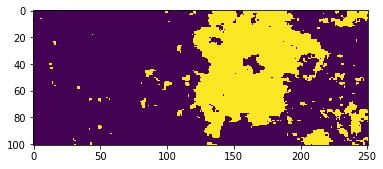

In [148]:
print(embedding_stack_ff.shape)
res_indicator = np.zeros((25351, 1))
res_indicator[np.where((embedding_stack_ff[:, 1]<-2) & (embedding_stack_ff[:, 0]<0.5))] = 1
plt.imshow(res_indicator.reshape(near_traces.shape[0], near_traces.shape[1]))

Text(0.5,1,'Far')

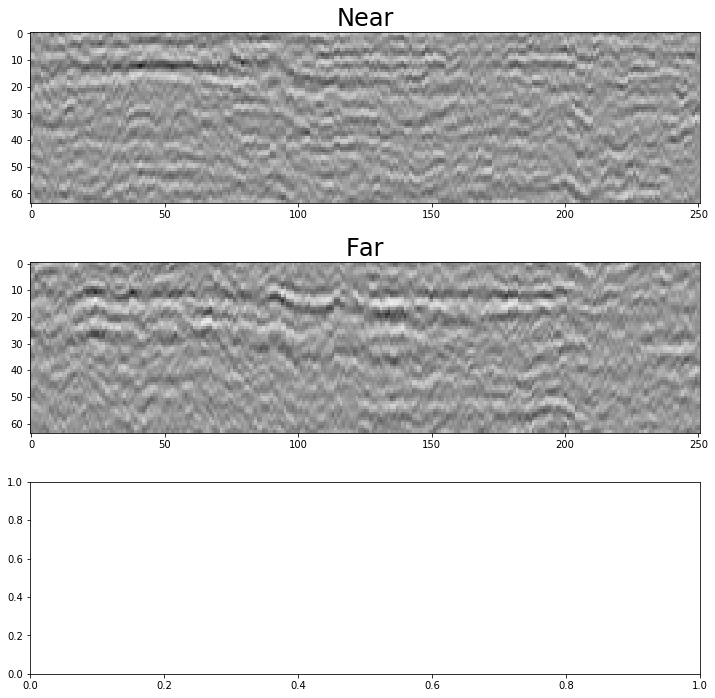

In [141]:
line = 32
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
sc = ax[0].imshow(near_traces[line].T, cmap="Greys", vmin=-7, vmax=7)
ax[1].imshow(far_traces[line].T, cmap="Greys", vmin=-7, vmax=7)
ax[0].set_title("Near", fontsize=24)
ax[1].set_title("Far", fontsize=24)
#fig.colorbar(sc)

Text(0.5,1,'Fluid Factor')

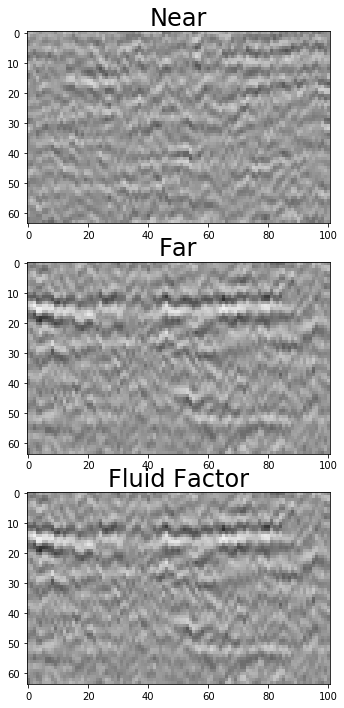

In [142]:
line = 160
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
sc = ax[0].imshow(near_traces[:, line].T, cmap="Greys", vmin=-7, vmax=7)
ax[1].imshow(far_traces[:, line].T, cmap="Greys", vmin=-7, vmax=7)
ax[2].imshow(FF.reshape(near_traces.shape[0], near_traces.shape[1], 64)[:, line, :].T, cmap="Greys", vmin=-7, vmax=7)
#ax[3].imshow(far_traces[:, line].T-FF.reshape(near_traces.shape[0], near_traces.shape[1], 64)[:, line, :].T, cmap="Greys", vmin=-7, vmax=7)
ax[0].set_title("Near", fontsize=24)
ax[1].set_title("Far", fontsize=24)
ax[2].set_title("Fluid Factor", fontsize=24)
#fig.colorbar(sc)


(25351, 1)


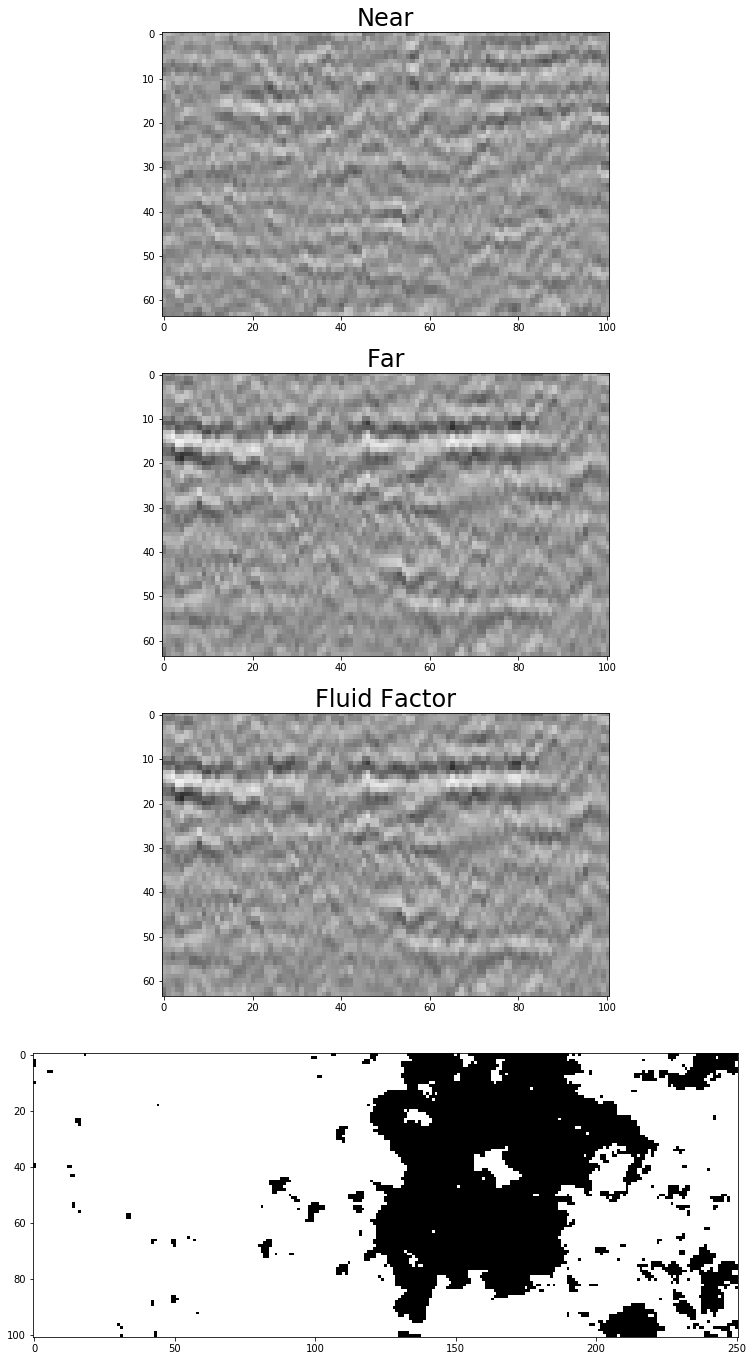

In [160]:
line = 160
fig, ax = plt.subplots(4, 1, figsize=(24, 24))
sc = ax[0].imshow(near_traces[:, line].T, cmap="Greys", vmin=-7, vmax=7)
ax[1].imshow(far_traces[:, line].T, cmap="Greys", vmin=-7, vmax=7)
ax[2].imshow(FF.reshape(near_traces.shape[0], near_traces.shape[1], 64)[:, line, :].T, cmap="Greys", vmin=-7, vmax=7)
print(res_indicator.shape)
sc = ax[3].imshow(res_indicator.reshape(near_traces.shape[0], near_traces.shape[1]), cmap="Greys")

ax[0].set_title("Near", fontsize=24)
ax[1].set_title("Far", fontsize=24)
ax[2].set_title("Fluid Factor", fontsize=24)
fig.savefig("near_mid_far_ff.png", dpi=300, bbox_inches="tight")

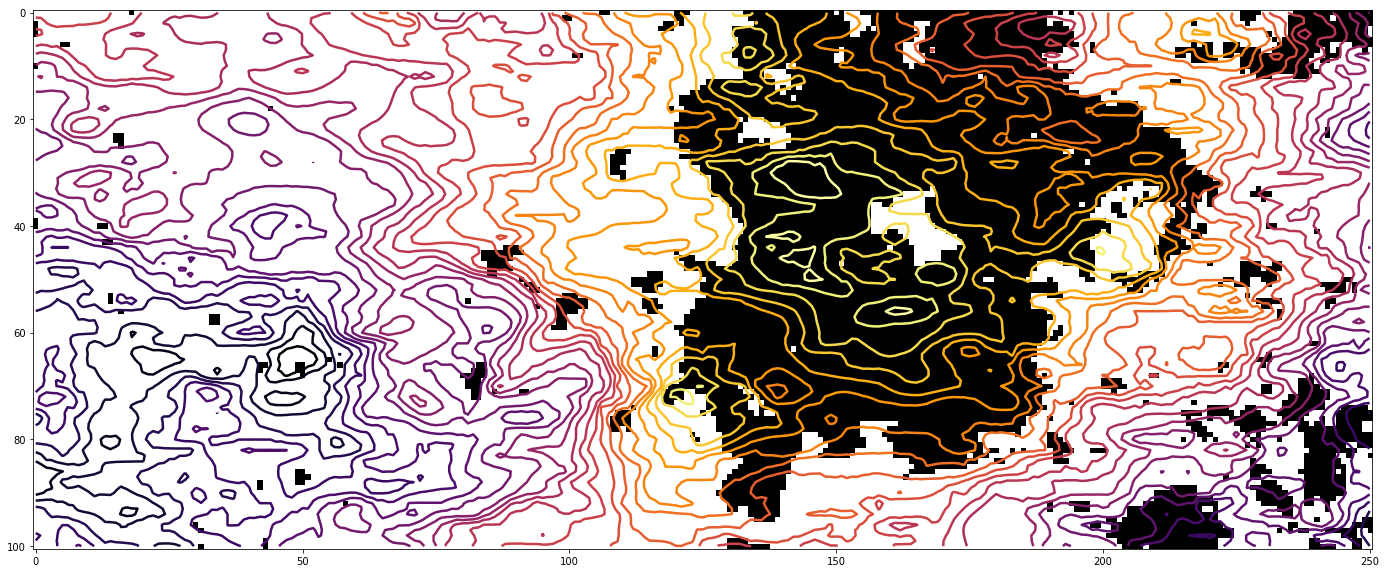

In [159]:
horizon = np.load("horizon.npy")
np.save("res_indicator.npy", res_indicator.reshape(near_traces.shape[0], near_traces.shape[1]))
X, Y = np.meshgrid(np.arange(0, horizon.shape[1]), np.arange(0, horizon.shape[0]))

fig, ax = plt.subplots(1, 1, figsize=(24, 24))
c1 = ax.contour(X, Y, horizon, alpha=1.0, levels=np.linspace(horizon.min(), horizon.max(), 25), linewidths=2.5, cmap="inferno_r")
sc = ax.imshow(res_indicator.reshape(near_traces.shape[0], near_traces.shape[1]), cmap="Greys")
fig.savefig("top_structure_and_binary_fluid_class.png", dpi=300, bbox_inches="tight")

/home/lm715/anaconda2/envs/dlenv/lib/python3.6/site-packages/matplotlib/contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


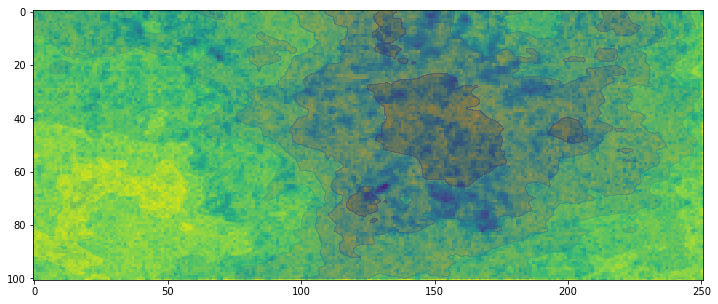

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sc = ax.imshow(np.min(FF.reshape(near_traces.shape[0], near_traces.shape[1], 64)[:, :, :], 2), cmap="")
c1 = ax.contourf(X, Y, horizon, alpha=0.5, levels=np.linspace(horizon.min(), horizon.max(), 8), linewidths=5)
#fig.colorbar(sc)

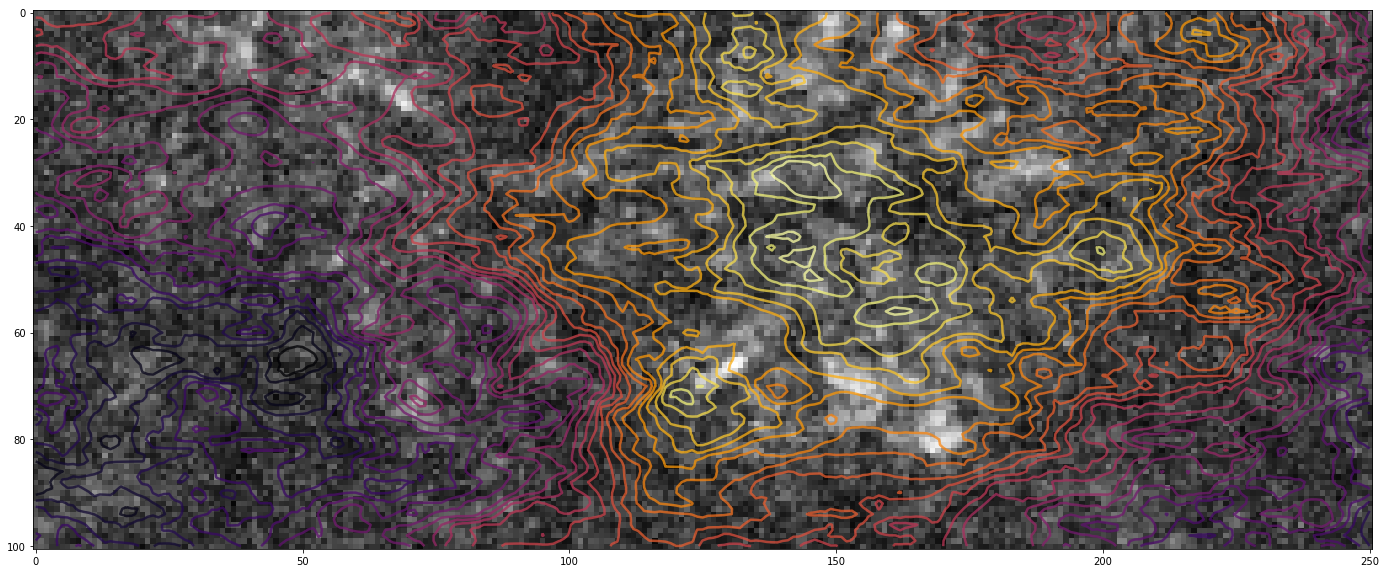

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(24, 24))
c1 = ax.contour(X, Y, horizon, alpha=0.75, levels=np.linspace(horizon.min(), horizon.max(), 25), linewidths=2.5, cmap="inferno_r")
sc = ax.imshow(np.min(FF.reshape(near_traces.shape[0], near_traces.shape[1], 64)[:, :, :], 2), cmap="Greys")
fig.savefig("top_structure_and_fluid_factor.png", dpi=300, bbox_inches="tight")